### Resilience Metrics Calculation

In [1]:
import numpy as np
import pandas as pd

#Change cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Panama_city'
resilience_table = pd.DataFrame(columns = ['category','pre_disaster_effect','short_term_impact','long_term_impact'])

#Data input
city_2018_08 = pd.read_excel(city + '_2018_08.xlsx','Sheet1')[['category','visits_by_day']]
city_2018_09 = pd.read_excel(city + '_2018_09.xlsx','Sheet1')[['category','visits_by_day']]
city_2018_10 = pd.read_excel(city + '_2018_10.xlsx','Sheet1')[['category','visits_by_day']]
city_2018_11 = pd.read_excel(city + '_2018_11.xlsx','Sheet1')[['category','visits_by_day']]

#category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]
category = [[23,42],[31,32,33],[44,45],[52],[53],[61],[62],[71,72]]

for k in range(len(category)):
    df_2018_08 = city_2018_08[city_2018_08['category'].isin(category[k])].reset_index()
    df_2018_09 = city_2018_09[city_2018_09['category'].isin(category[k])].reset_index()
    df_2018_10 = city_2018_10[city_2018_10['category'].isin(category[k])].reset_index()
    df_2018_11 = city_2018_11[city_2018_11['category'].isin(category[k])].reset_index()
    
    visits_2018_08, visits_2018_09, visits_2018_10, visits_2018_11 = [0] * 31, [0] * 30, [0] * 31, [0] * 30
    for i in range(len(df_2018_08)):
        visits_2018_08 = np.sum([visits_2018_08, eval(df_2018_08['visits_by_day'][i])], axis=0)
    for i in range(len(df_2018_09)):
        visits_2018_09 = np.sum([visits_2018_09, eval(df_2018_09['visits_by_day'][i])], axis=0)
    for i in range(len(df_2018_10)):
        visits_2018_10 = np.sum([visits_2018_10, eval(df_2018_10['visits_by_day'][i])], axis=0)
    for i in range(len(df_2018_11)):
        visits_2018_11 = np.sum([visits_2018_11, eval(df_2018_11['visits_by_day'][i])], axis=0)
    
    visits_total = list(visits_2018_08) + list(visits_2018_09) + list(visits_2018_10) + list(visits_2018_11)
    df_visits = pd.DataFrame({'visits': visits_total}).rolling(7).mean()
    visits_09 = df_visits['visits'].tolist()[31:61]
    visits_10 = df_visits['visits'].tolist()[61:92]
    visits_11 = df_visits['visits'].tolist()[92:]
    
    #Baseline
    visits_sum = np.array(visits_09[2:9]) + np.array(visits_09[9:16]) + np.array(visits_09[16:23]) + np.array(visits_09[23:])
    visits_mean = visits_sum / 4
    baseline = visits_mean.tolist()[2:] + visits_mean.tolist() * 5
    
    #Visits under a disaster
    visits = visits_10[2:] + visits_11[:11]
    
    #Percentage change
    percentage_change = []
    for i in range(len(visits)):
        percentage_change.append((visits[i] - baseline[i]) / baseline[i])
    
    #Determination of during-disaster and post-disaster stages: pointer
    bottom = percentage_change.index(min(percentage_change[7:17]))
    pointer = bottom
    while pointer < len(percentage_change) - 1:
        pointer += 1
        if percentage_change[pointer] >= -0.1:
            break
    
    #Pre-disaster effect
    pre_sum = (max(percentage_change[0], 0) + max(percentage_change[7], 0)) / 2
    for i in range(1, 7):
        pre_sum += max(percentage_change[i], 0)
    
    #Short-term impact
    cur_sum = (percentage_change[7] + percentage_change[pointer]) / 2
    for i in range(8, pointer):
        cur_sum += percentage_change[i]
    
    #Long-term impact
    post_sum = np.mean(percentage_change[pointer:])
    
    resilience_table.loc[k] = [' '.join(map(str,category[k])), pre_sum, cur_sum, post_sum]
    resilience_table = resilience_table.round(3)

#Data output
resilience_table

,category,pre_disaster_effect,short_term_impact,long_term_impact
0,23 42,0.149,-3.314,0.284
1,31 32 33,0.012,-15.133,-0.285
2,44 45,0.333,-7.284,-0.049
3,52,0.526,-6.641,0.046
4,53,0.049,-6.501,-0.017
5,61,0.159,-13.523,-0.210
6,62,0.234,-4.683,-0.088
7,71 72,0.180,-11.610,-0.096


### Visualization of POI Visit Pattern

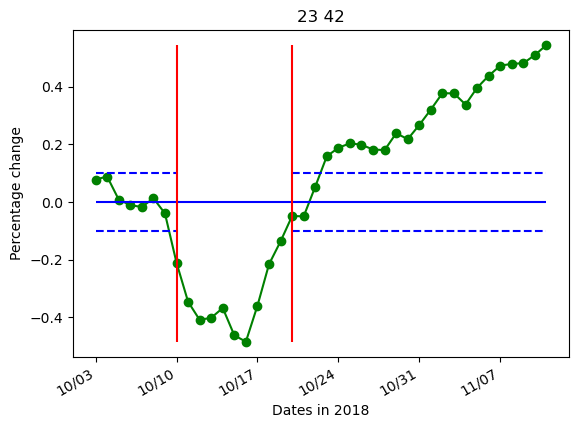

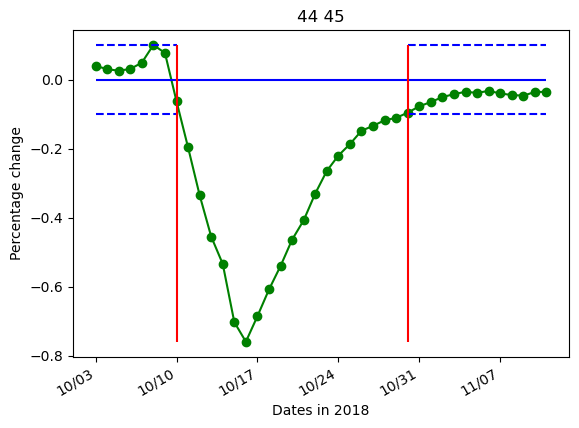

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

#Change cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Panama_city'

#Data input
city_2018_08 = pd.read_excel(city + '_2018_08.xlsx','Sheet1')[['category','visits_by_day']]
city_2018_09 = pd.read_excel(city + '_2018_09.xlsx','Sheet1')[['category','visits_by_day']]
city_2018_10 = pd.read_excel(city + '_2018_10.xlsx','Sheet1')[['category','visits_by_day']]
city_2018_11 = pd.read_excel(city + '_2018_11.xlsx','Sheet1')[['category','visits_by_day']]

#category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]
category = [[23,42],[44,45]]

for k in range(len(category)):
    df_2018_08 = city_2018_08[city_2018_08['category'].isin(category[k])].reset_index()
    df_2018_09 = city_2018_09[city_2018_09['category'].isin(category[k])].reset_index()
    df_2018_10 = city_2018_10[city_2018_10['category'].isin(category[k])].reset_index()
    df_2018_11 = city_2018_11[city_2018_11['category'].isin(category[k])].reset_index()
    
    visits_2018_08, visits_2018_09, visits_2018_10, visits_2018_11 = [0] * 31, [0] * 30, [0] * 31, [0] * 30
    for i in range(len(df_2018_08)):
        visits_2018_08 = np.sum([visits_2018_08, eval(df_2018_08['visits_by_day'][i])], axis=0)
    for i in range(len(df_2018_09)):
        visits_2018_09 = np.sum([visits_2018_09, eval(df_2018_09['visits_by_day'][i])], axis=0)
    for i in range(len(df_2018_10)):
        visits_2018_10 = np.sum([visits_2018_10, eval(df_2018_10['visits_by_day'][i])], axis=0)
    for i in range(len(df_2018_11)):
        visits_2018_11 = np.sum([visits_2018_11, eval(df_2018_11['visits_by_day'][i])], axis=0)
    
    visits_total = list(visits_2018_08) + list(visits_2018_09) + list(visits_2018_10) + list(visits_2018_11)
    df_visits = pd.DataFrame({'visits': visits_total}).rolling(7).mean()
    visits_09 = df_visits['visits'].tolist()[31:61]
    visits_10 = df_visits['visits'].tolist()[61:92]
    visits_11 = df_visits['visits'].tolist()[92:]
    
    #Baseline
    visits_sum = np.array(visits_09[2:9]) + np.array(visits_09[9:16]) + np.array(visits_09[16:23]) + np.array(visits_09[23:])
    visits_mean = visits_sum / 4
    baseline = visits_mean.tolist()[2:] + visits_mean.tolist() * 5
    
    #Visits under a disaster
    visits = visits_10[2:] + visits_11[:11]
    
    #Percentage change
    percentage_change = []
    for i in range(len(visits)):
        percentage_change.append((visits[i] - baseline[i]) / baseline[i])
    
    #Determination of during-disaster and post-disaster stages: pointer
    bottom = percentage_change.index(min(percentage_change[7:17]))
    pointer = bottom
    while pointer < len(percentage_change) - 1:
        pointer += 1
        if percentage_change[pointer] >= -0.1:
            break
    
    #Visualization
    dates = list(range(20181003,20181032)) + list(range(20181101,20181112))
    x = [datetime.strptime(str(d), '%Y%m%d').date() for d in dates]
    plt.plot(x, percentage_change, 'o-', color = 'g')
    plt.gcf().autofmt_xdate()
    
    plt.hlines(0, x[0], x[len(percentage_change)-1], color = 'b')
    plt.hlines(0.1, x[0], x[7], color = 'b', linestyle = 'dashed')
    plt.hlines(-0.1, x[0], x[7], color = 'b', linestyle = 'dashed')
    plt.hlines(0.1, x[pointer], x[len(percentage_change)-1], color = 'b', linestyle = 'dashed')
    plt.hlines(-0.1, x[pointer], x[len(percentage_change)-1], color = 'b', linestyle = 'dashed')
    plt.vlines(x[7], min(percentage_change), max(percentage_change), color = 'r')
    if pointer < len(percentage_change) - 1:
        plt.vlines(x[pointer], min(percentage_change), max(percentage_change), color = 'r')
    
    plt.xlabel('Dates in 2018')
    plt.ylabel('Percentage change')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.xticks(x[::7])
    
    plt.title(' '.join(map(str, category[k])))
    #plt.savefig(' '.join(map(str, category[k])) + '.svg', dpi=600)
    plt.show()